In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [2]:
# Read files to pandas dataframes
train = pd.read_csv('data/Train.csv')
test = pd.read_csv('data/Test.csv')
sample_submission = pd.read_csv('data/SampleSubmission.csv')

In [3]:
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [4]:
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

In [5]:
special = ["Sample_ID", "Label"]
uniq = set(map(lambda s: s.split('_')[1] if '_' in s and not s in special else s, list(train.columns)))
uniq -=  set(special)
uniq = list(uniq)
", ".join(uniq)

'geology, procurv, twi, slope, aspect, lsfactor, sdoif, placurv, elevation'

In [6]:
desc = {}
desc["elevation"] = "Digital elevation of the terrain surface in meter"
desc["slope"] = "Angle of the slope inclination in degree"
desc["aspect"] = "Exposition of the slope in degree"
desc["placurv"] = "Planform curvature, curvature perpendicular to the direction of the maximum slope"
desc["procurv"] = "Profile curvature, curvature parallel to the slope, indicating the direction of maximum slope"
desc["lsfactor"] = "Length-slope factor that accounts for the effects of topography on erosion"
desc["twi"] = "Topographic wetness index, an index to quantify the topographic control on hydrological process"
desc["geology"] = {
    1: "Weathered Cretaceous granitic rocks",
    2: "Weathered Jurassic granite rocks",
    3: "Weathered Jurassic tuff and lava",
    4: "Weathered Cretaceous tuff and lava",
    5: "Quaternary deposits",
    6: "Fill",
    7: "Weathered Jurassic sandstone, siltstone and mudstone"
}
desc["sdoif"] = "Step duration orographic intensification factor: an index to quantify the amplification of orography on rainfall"

In [7]:
squares = pd.DataFrame()
for i in range(25):
    mycols = list(map(lambda col: f"{i+1}_{col}", uniq))
    squares = squares.append(train[mycols + special].rename(dict(zip(mycols, uniq)), axis=1))
squares

,geology,procurv,twi,slope,aspect,lsfactor,sdoif,placurv,elevation,Sample_ID,Label
0,3,0.013903,3.173340,35.26439,98.1301,8.045186,1.281767,0.038514,130,1,0
1,3,-0.012546,4.396348,32.31153,198.4350,9.089893,1.359568,0.007030,161,2,1
2,2,-0.015857,3.912020,42.67464,310.6013,12.115220,1.365062,0.007581,149,3,0
3,2,0.018884,3.021531,19.82703,213.6901,3.416162,1.100921,0.033529,80,4,0
4,2,-0.000098,3.523277,32.63194,128.6598,7.740312,1.284558,0.005615,117,5,0
...,...,...,...,...,...,...,...,...,...,...,...
10859,2,-0.028007,5.979714,17.54840,108.4350,0.922690,1.272048,-0.007938,192,10860,0
10860,3,0.004467,3.510076,26.56505,180.0000,5.760761,1.331126,0.020360,418,10861,1
10861,3,-0.017149,4.327808,40.31554,135.0000,12.188480,1.298311,-0.024226,323,10862,1
10862,2,0.030222,2.963617,32.31153,251.5650,6.825168,1.355067,0.038743,103,10863,0


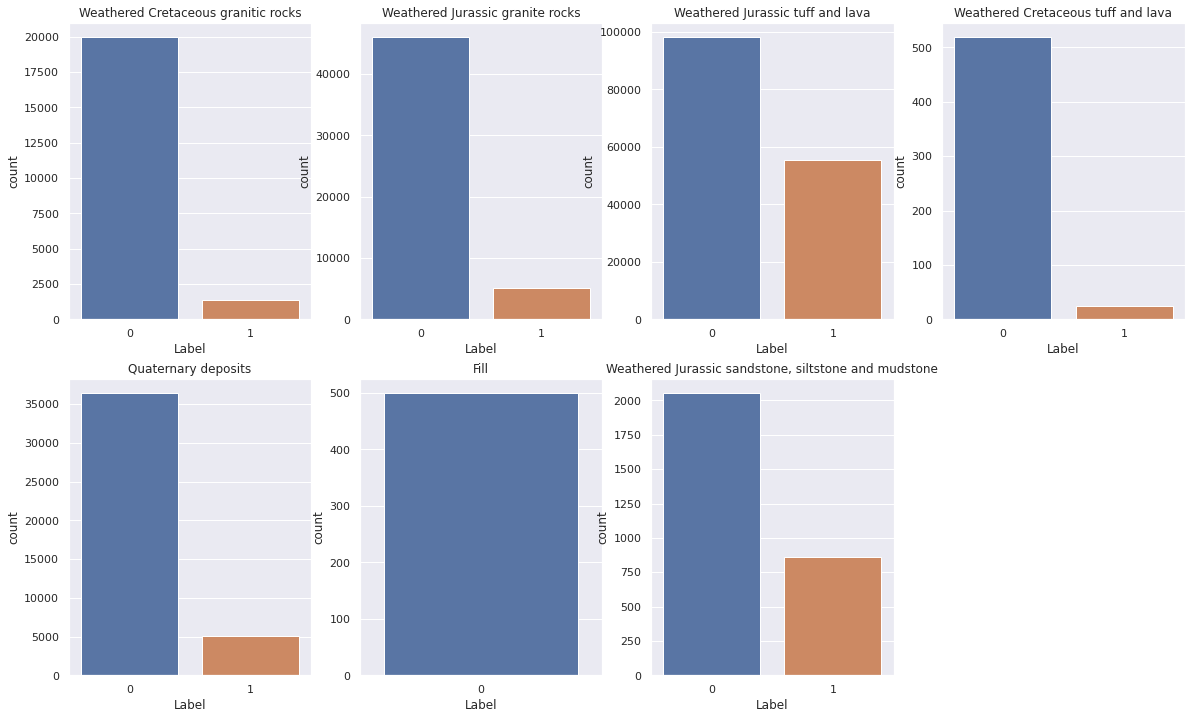

In [8]:
plt.figure(figsize=(20, 12))
for i in range(1, 8):
    plt.subplot(2, 4, i)
    sns.countplot(x= squares[squares["geology"] == i].Label)
    plt.title(desc["geology"][i])

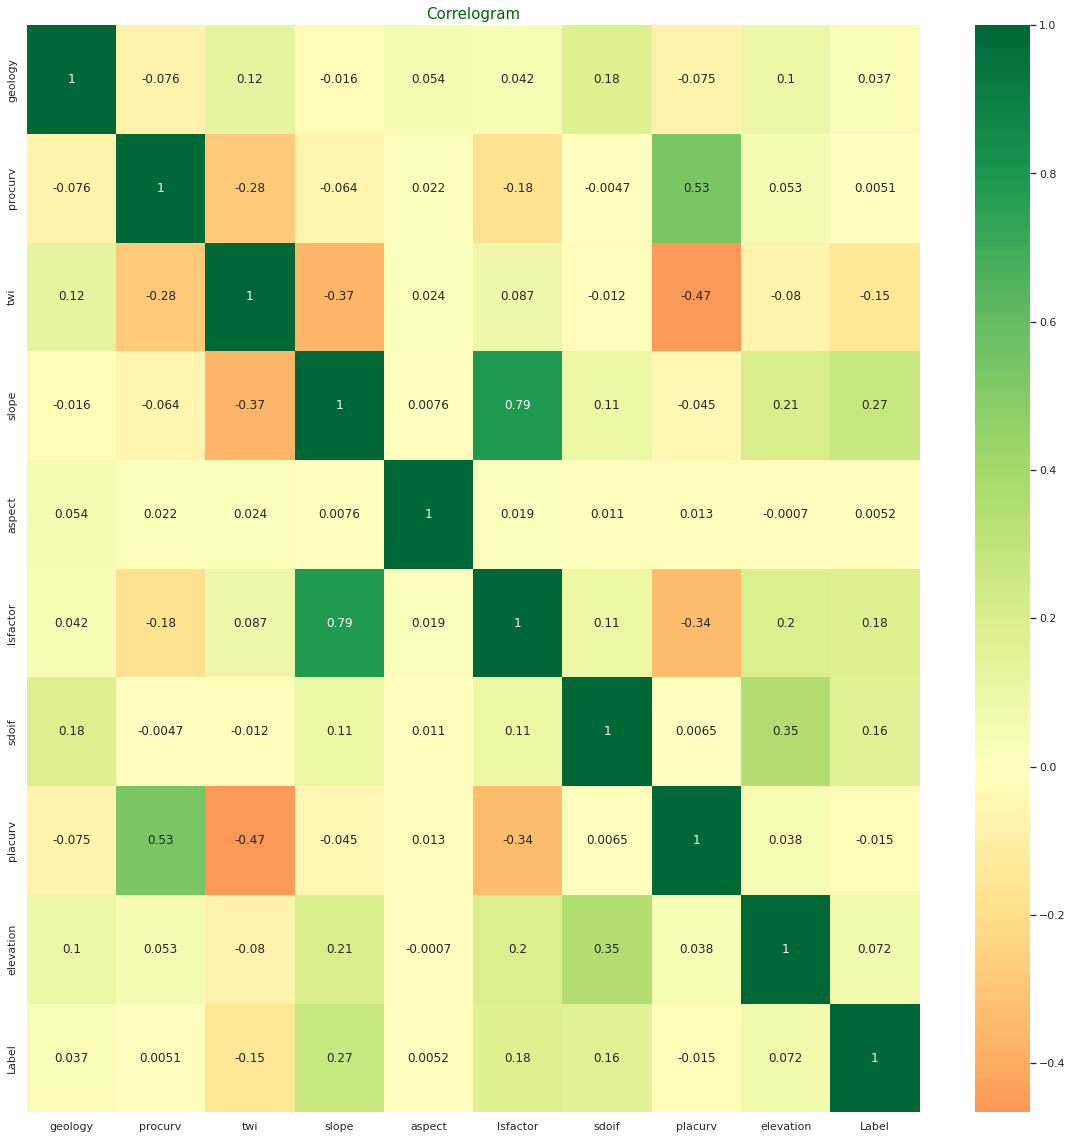

In [9]:
corr = squares.drop(["Sample_ID"], axis=1).corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

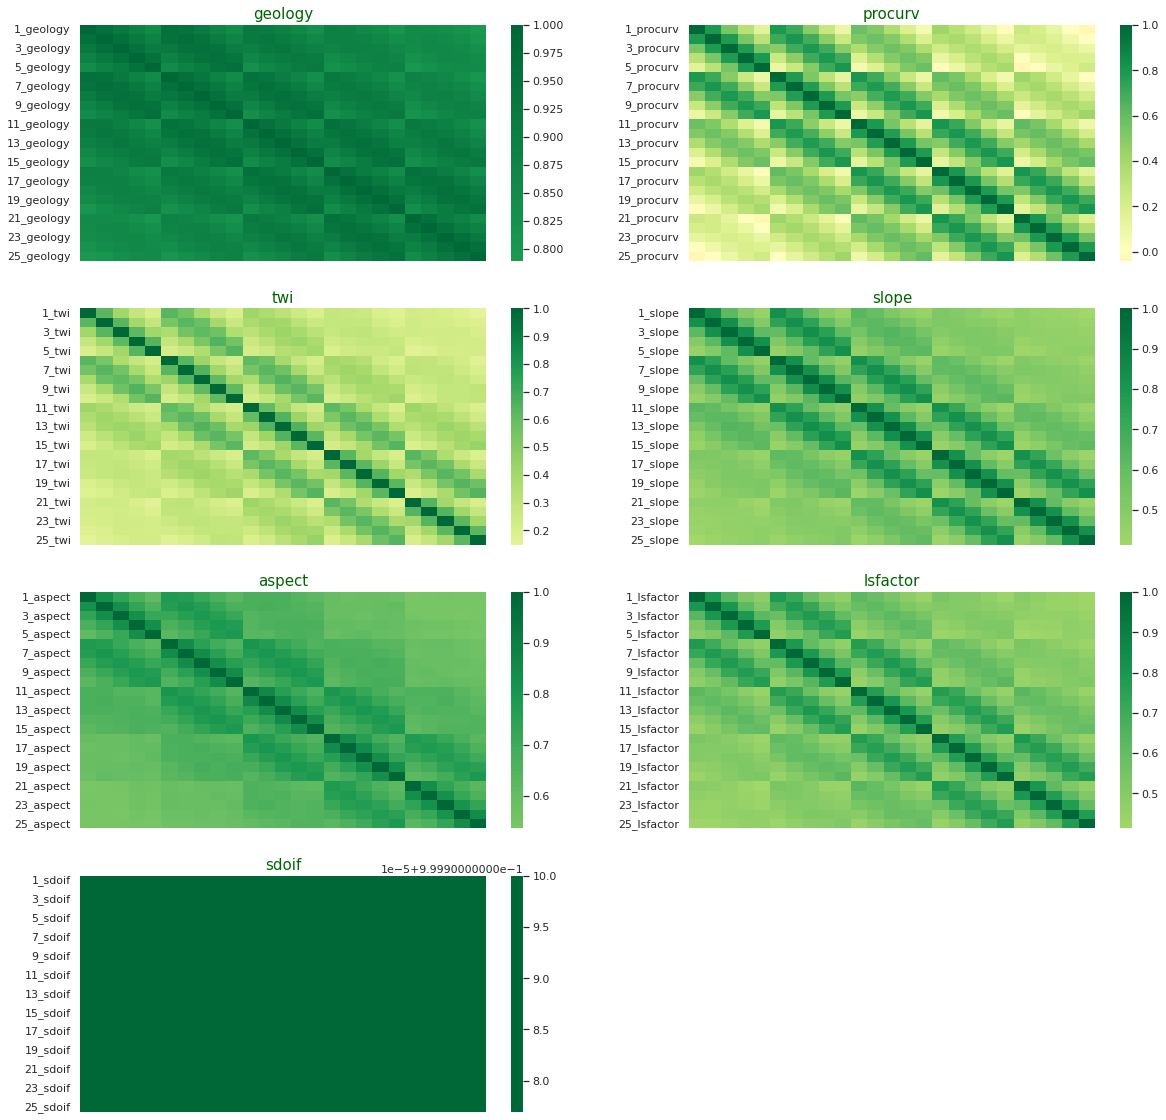

In [10]:
from dfcols import all_square_cols
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(4, 2, i+1)
    corr = train[all_square_cols(uniq[i])].corr()
    sns.heatmap(corr, cmap='RdYlGn', center = 0)
    plt.title(uniq[i], fontsize = 15, color = 'darkgreen')
    plt.xticks([])

In [11]:
np.array(squares["geology"] == 6, dtype=int).sum()

500

In [12]:
def one_hot(df: pd.DataFrame, catcol_name: str, cat_val: int):
    return np.array(df[catcol_name] == cat_val, dtype=int)

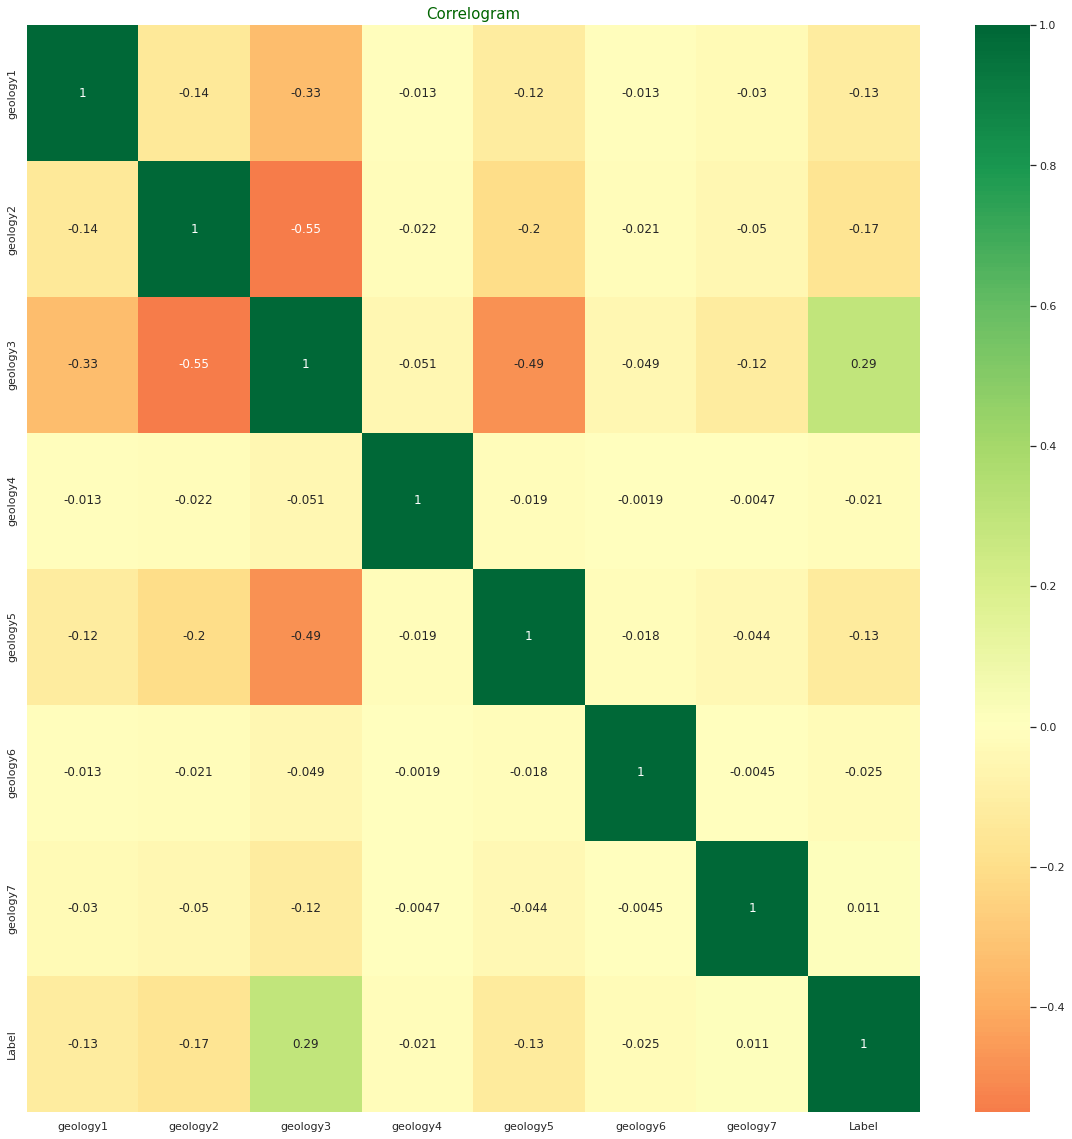

In [13]:
for i in range(7):
    squares[f"geology{i+1}"] = one_hot(squares, "geology", i+1)

geos = [f"geology{i+1}" for i in range(7)]
corr = squares[geos + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [14]:
import feat_trans
train["geology"] = feat_trans.most_frequent(train, "geology")

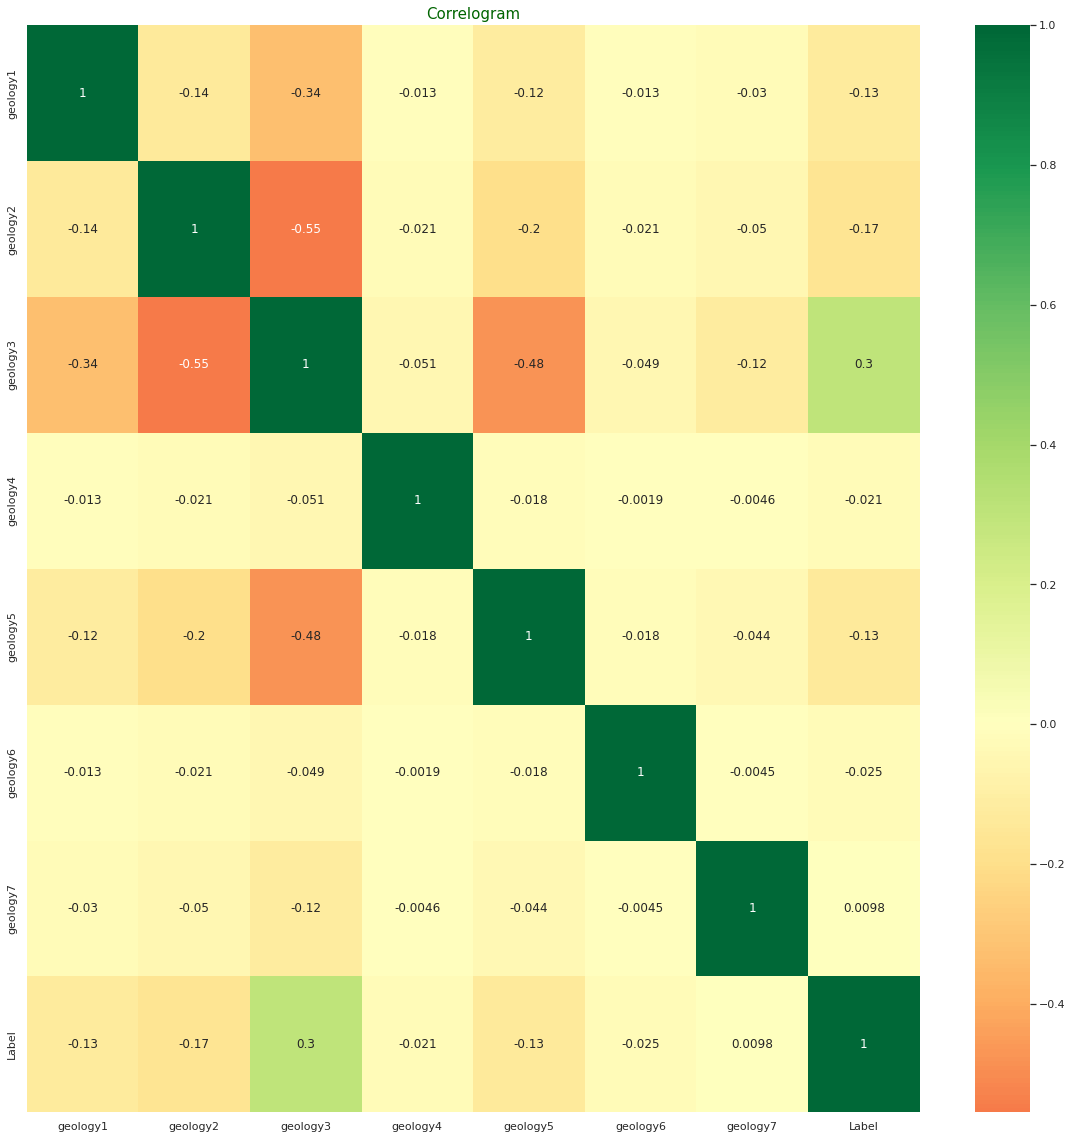

In [15]:
for i in range(7):
    train[f"geology{i+1}"] = one_hot(train, "geology", i+1)

corr = train[[f"geology{i+1}" for i in range(7)] + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [16]:
cont = list(set(uniq) - set(["geology"]))
", ".join(cont)

'procurv, twi, slope, aspect, lsfactor, sdoif, placurv, elevation'

In [17]:
for col in cont:
    train[f"{col}_mean"] = feat_trans.mean(train, col)
    train[f"{col}_std"] = feat_trans.std(train, col)

In [18]:
means = [f"{col}_mean" for col in cont]
stds = [f"{col}_std" for col in cont]

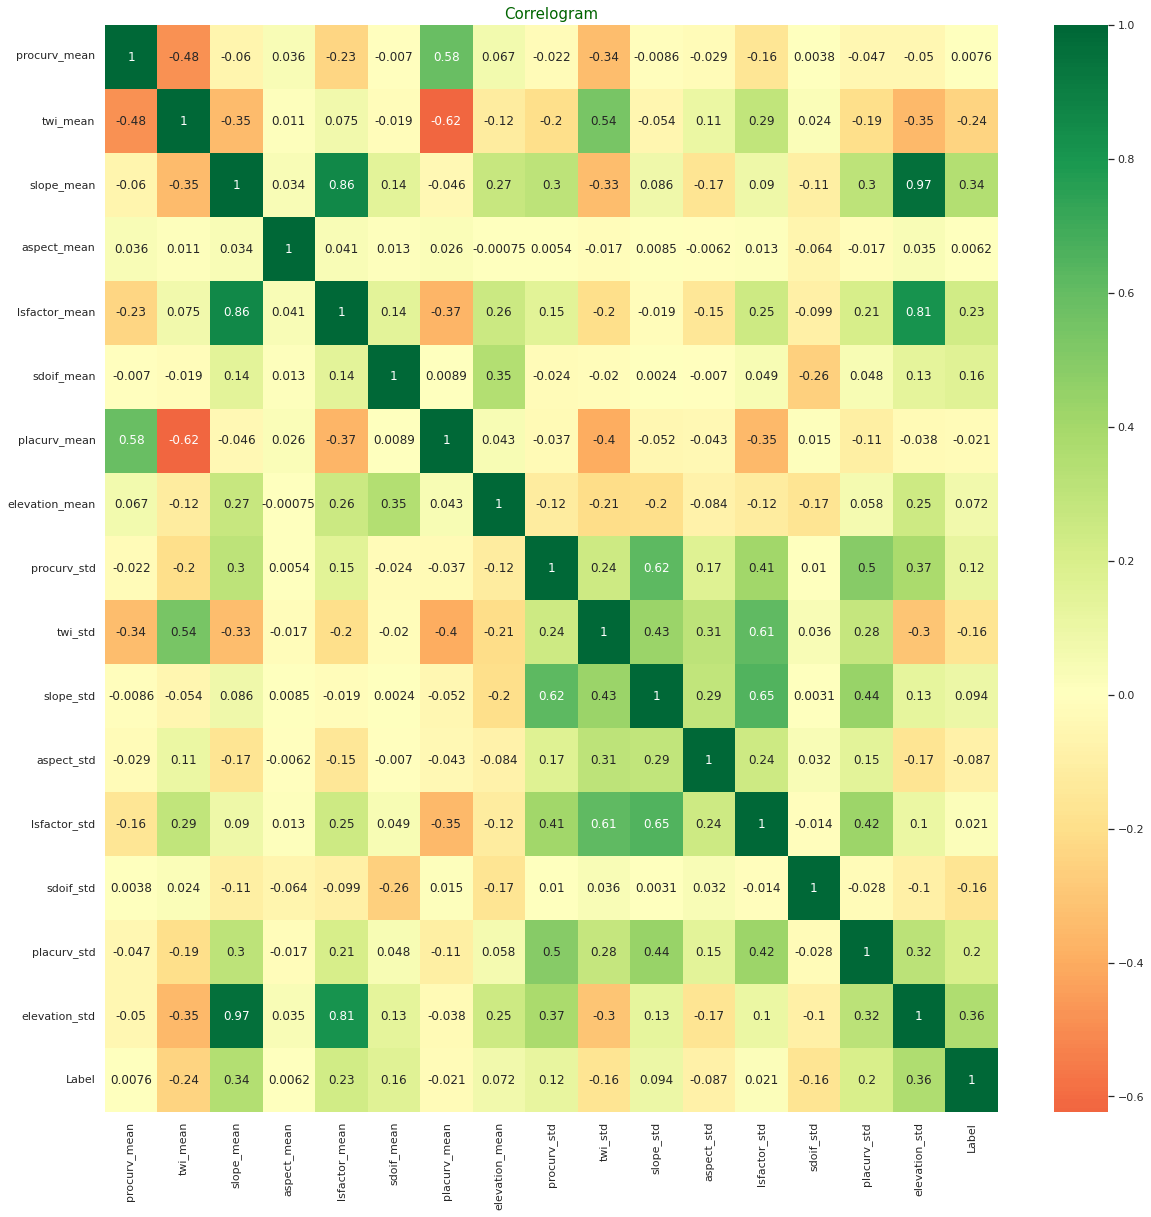

In [19]:
corr = train[means + stds + ["Label"]].corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [20]:
train[means + stds].describe()

,procurv_mean,twi_mean,slope_mean,aspect_mean,lsfactor_mean,sdoif_mean,placurv_mean,elevation_mean,procurv_std,twi_std,slope_std,aspect_std,lsfactor_std,sdoif_std,placurv_std,elevation_std
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000
mean,-0.000184,4.540098,28.254034,187.413859,7.693782,1.301057,0.000554,224.834183,0.013046,0.931792,5.491054,37.149141,2.027241,0.000099,0.015260,3.950607
std,0.014013,0.991463,7.549079,84.567059,2.855506,0.051894,0.018118,158.261783,0.007913,0.790937,2.645571,42.375016,1.184415,0.000087,0.008031,1.425675
min,-0.077813,2.299132,6.547674,11.884689,0.001403,1.092452,-0.082686,2.960000,0.000045,0.101251,0.242184,1.593168,0.001152,0.000005,0.000054,0.692820
25%,-0.007712,3.810877,23.094402,116.528060,5.723727,1.286432,-0.010534,101.430000,0.007837,0.402875,3.555463,11.365407,1.247696,0.000048,0.009423,2.959865
50%,-0.000506,4.373911,28.300718,184.062198,7.546701,1.308126,0.000792,191.280000,0.010764,0.629487,4.844952,17.790866,1.725479,0.000062,0.013280,3.844164
75%,0.007246,5.138590,33.302306,259.891378,9.475817,1.331631,0.012297,311.320000,0.015636,1.153105,6.790685,37.406930,2.440486,0.000141,0.019089,4.789655
max,0.115547,11.979647,60.894232,357.238504,24.131212,1.370632,0.094629,911.360000,0.087726,6.320540,18.803736,174.683842,14.687505,0.001852,0.085922,15.503600


In [30]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold

array([[130, 129, 127, ..., 113, 111, 110],
       [161, 158, 155, ..., 157, 154, 150],
       [149, 151, 154, ..., 171, 170, 169],
       ...,
       [348, 345, 342, ..., 330, 326, 323],
       [ 93,  91,  90, ..., 104, 103, 103],
       [230, 232, 233, ..., 240, 242, 244]])